# Welcome to Telco Customer Churn's notebook for exploratory data analysis
To run all the code, you can use the "run all" function. You can also follow along and run the code accordingly. Note that we assume this project to be running with ***Jupyter Notebook***.

## 1. Dependencies
We have recorded all the required dependencies in `requirements.txt`, to get all the dependencies installed, simply run the below's code.

In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## 2. Project setup
Below cell imports all the library needed and do some global setting for the dataframes.

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
pd.options.display.max_colwidth = 100

data_root = 'dataset'
dataset_name = "churn_data_clean_no_rebalance.csv"

## 3. Reading in data
We proceed to perform exploratory data analysis (EDA) with cleaned data that is not rebalanced, which is saved in `churn_data_clean_no_rebalance.csv`.

In [4]:
data_path = os.path.join(data_root, dataset_name)
df = pd.read_csv(data_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Exploratory Data Analysis
This section begins the steps for the exploratory data analysis for our dataset.

### 4.1 Numerical Features

We start by looking for some basic statistic for the numerical feature of the dataset:

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


According to the data description (https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), the tenure is calculated by month, as the dataset originated from California, we assume that the values are in USD. `Tenure` have a mean value of 32 months with a standard deviation of 24, `MonthlyCharges` have a mean of 64 USD with a standard deviation of 30. From data cleaning, we identified that TotalCharges is devised from tenure and MonthlyCharges, so we will not be looking much at the value, below is the distribution chart for `tenure` and `MonthlyCharges`:

Text(0.5, 1.0, 'Distribution of Monthly Charges')

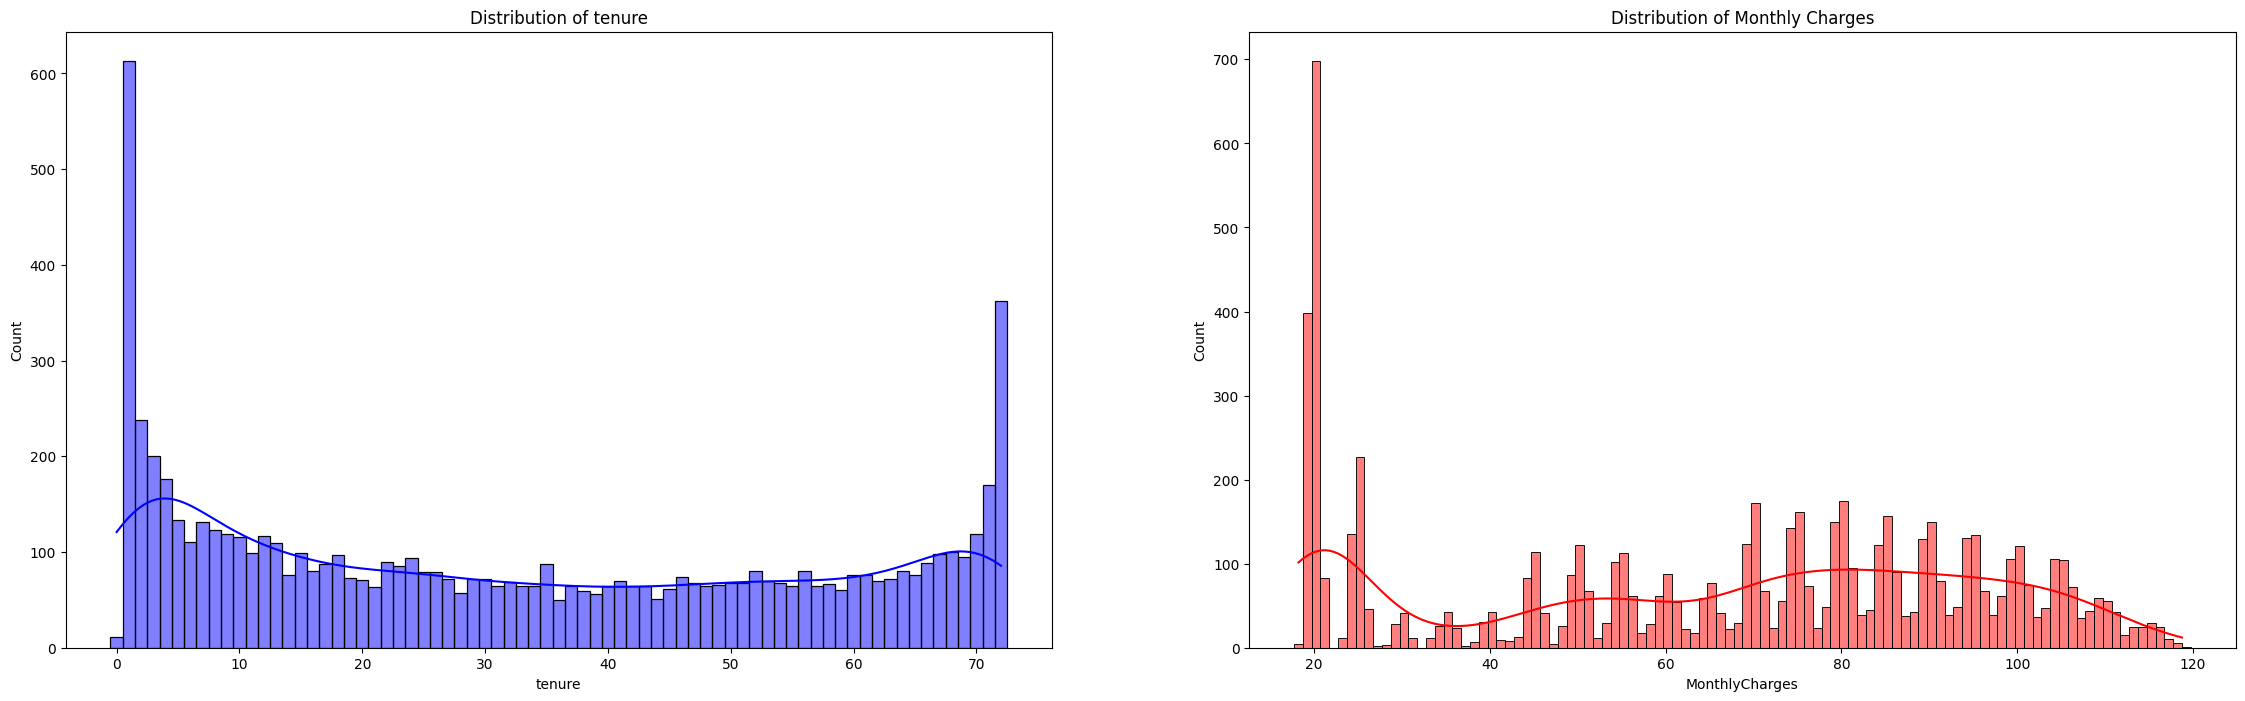

In [6]:
# distribution of the tenure and monthly charges with sns subplot
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
sns.histplot(df['tenure'], ax=ax[0], color='b', kde=True,  discrete=True)
ax[0].set_title('Distribution of tenure')

sns.histplot(df['MonthlyCharges'], ax=ax[1], color='r', kde=True, discrete=True)
ax[1].set_title('Distribution of Monthly Charges')



From the distribution plot, we can see that tenure have a u-shaped distribution, with most of the customer at 1 month of tenure. Since there seems to be repeating pattern for monthly charges, we can bin the value for easier observation: 

C:\Users\User\AppData\Local\Temp\ipykernel_22948\2226080447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MonthlyChargesBin', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Monthly Charges Bin')

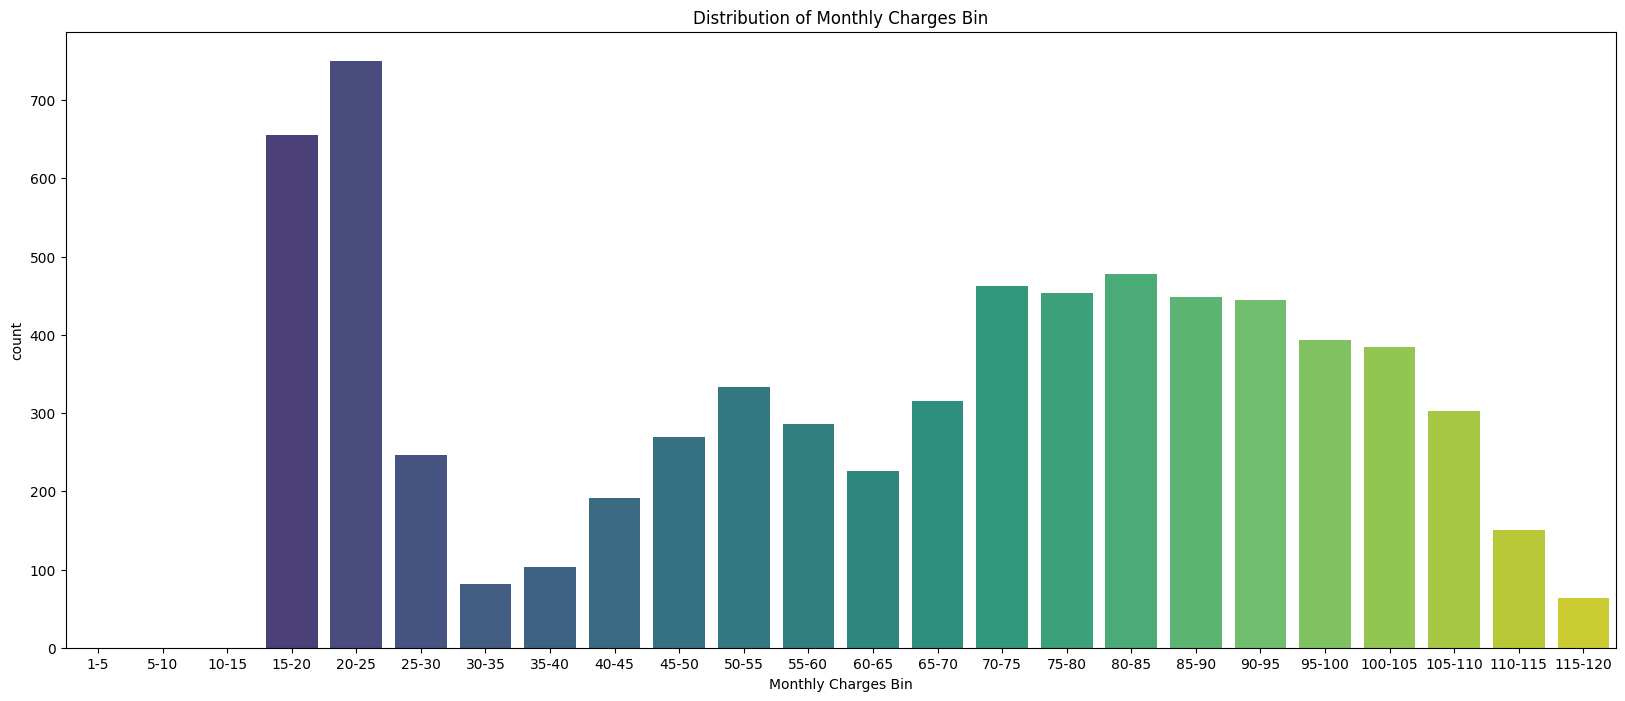

In [7]:
# bin monthly charges for 1-5, 5-10, 10-15, 15-20, 20-25, 25-30, 30-35, 35-40, 40-45, 45-50, 50-55, 55-60, 60-65, 65-70, 70-75, 75-80, 80-85, 85-90, 90-95, 95-100, 100-105, 105-110, 110-115, 115-120
df['MonthlyChargesBin'] = pd.cut(df['MonthlyCharges'], bins=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120], labels=['1-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120'])

# distribution of monthly charges bin
plt.figure(figsize=(20, 8))
sns.countplot(x='MonthlyChargesBin', data=df, palette='viridis')
plt.xlabel('Monthly Charges Bin')
plt.title('Distribution of Monthly Charges Bin')


Based on the plot, we can roughly conclude that there is three main group of customers for the telco company. We can further categorized them into three main groups: low budget group, middle budget group and high budget group:

C:\Users\User\AppData\Local\Temp\ipykernel_22948\214406281.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MonthlyChargesBin', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Customer Budget Group')

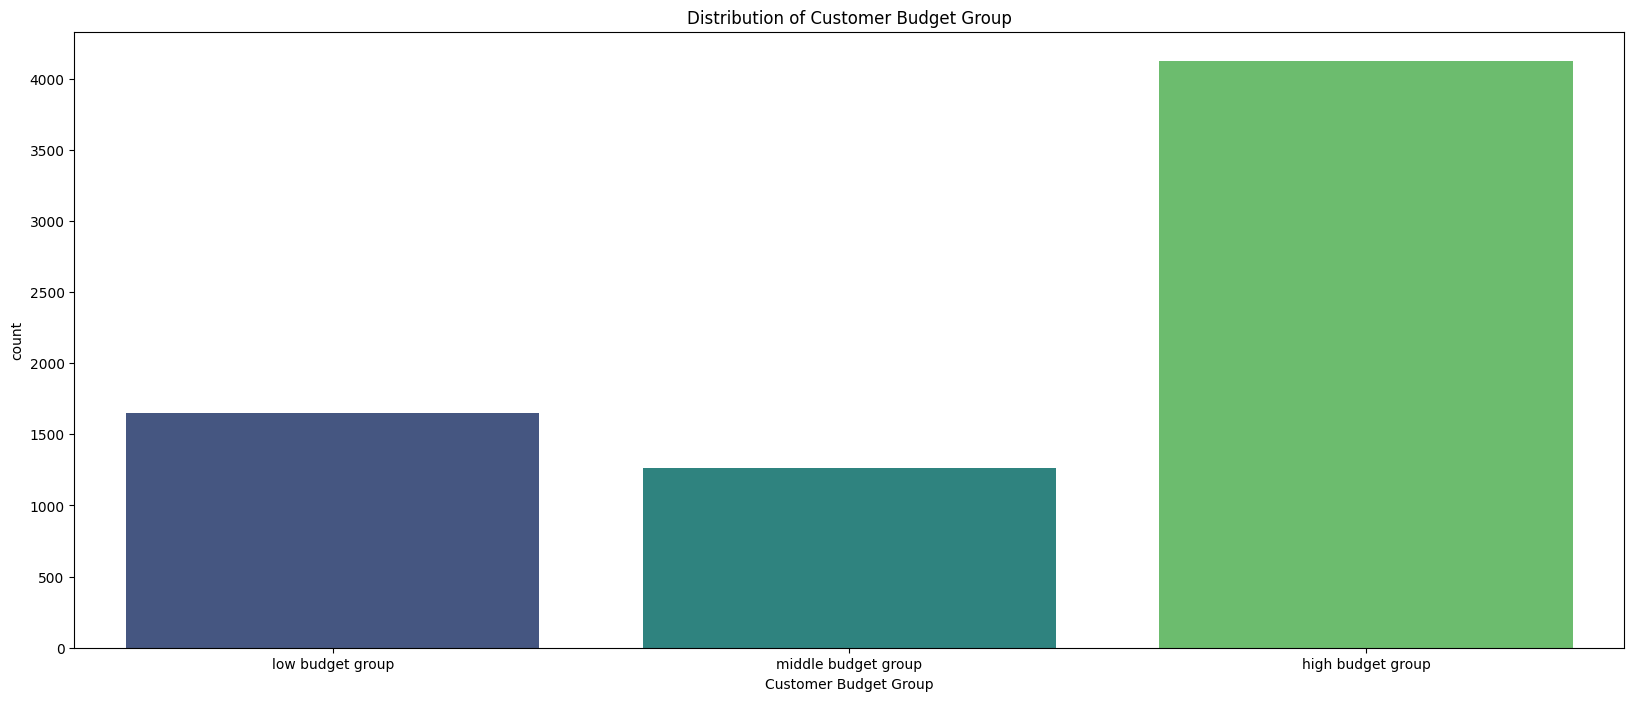

In [8]:
# bin monthly charges for 15-30,30-60, 60-120
df["MonthlyChargesBin"] = pd.cut(df["MonthlyCharges"], bins=[15, 30, 60, 120], labels=['low budget group', 'middle budget group', 'high budget group'])

# bin monthly charges for 0-30, 30-60, 60-90, 90-120
# df["MonthlyChargesBin"] = pd.cut(df["MonthlyCharges"], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])


plt.figure(figsize=(20, 8))
sns.countplot(x='MonthlyChargesBin', data=df, palette='viridis')
plt.xlabel('Customer Budget Group')
plt.title('Distribution of Customer Budget Group')


From the above plot, we can see that the majority of the customers are in the high budget group, followed by the low budget group and the middle budget group.

Next, we can check out the pearson correlation between each numerical features:

Text(0.5, 1.0, 'Pearson Correlation for the numerical features')

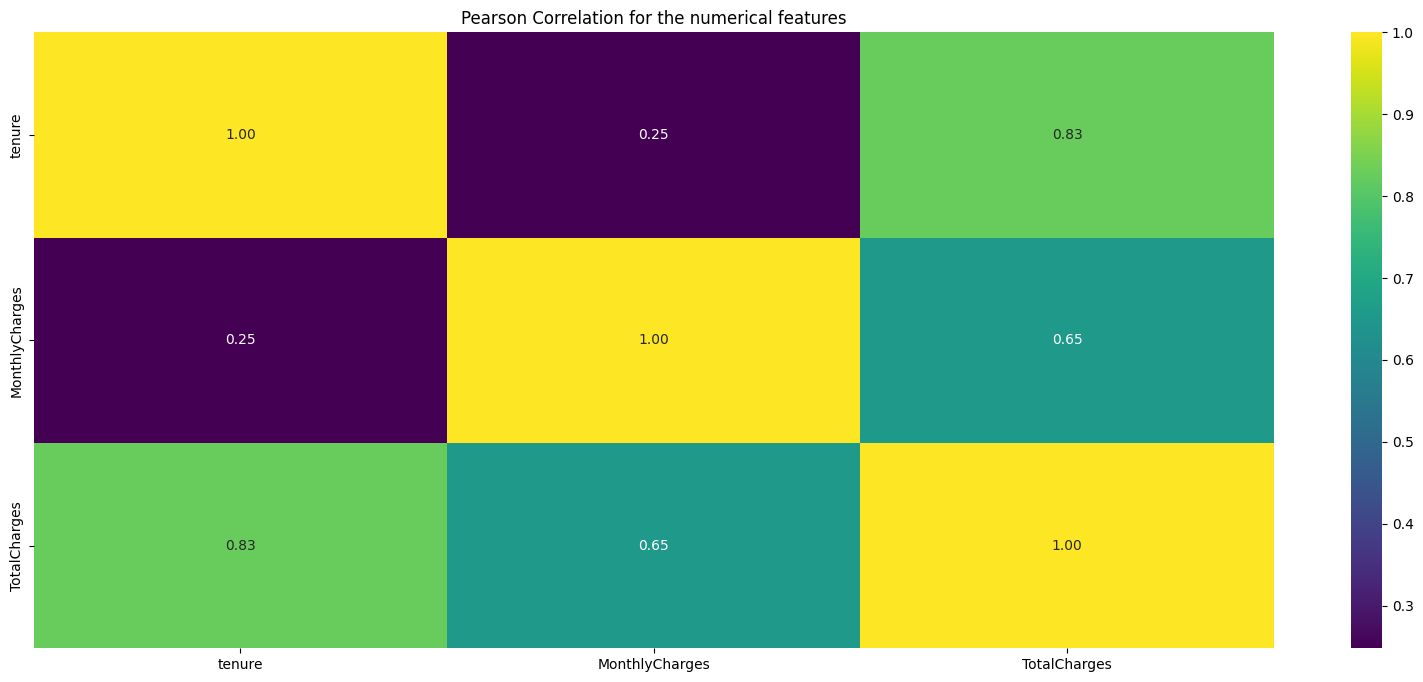

In [9]:
# Pearson correlation for the numerical features

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
# numerical_features.remove('TotalCharges')

plt.figure(figsize=(20, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Pearson Correlation for the numerical features')


Both `tenure` and `MonthlyCharges` have high positive correlation agaisnt `TotalCharges`, this is much expected and straightforward as the formula of `TotalCharges` comes from `TotalCharges=tenure*MonthlyCharges`. It is also clear from the heatmap that `tenure` and `MonthlyCharges` have low correlation with each other, this indicates that the monthly charges of a customer have less impact on their tenure.   

### 4.2 Categorical Features

We start by plotting pie charts for all categorical variables except `Churn`.

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


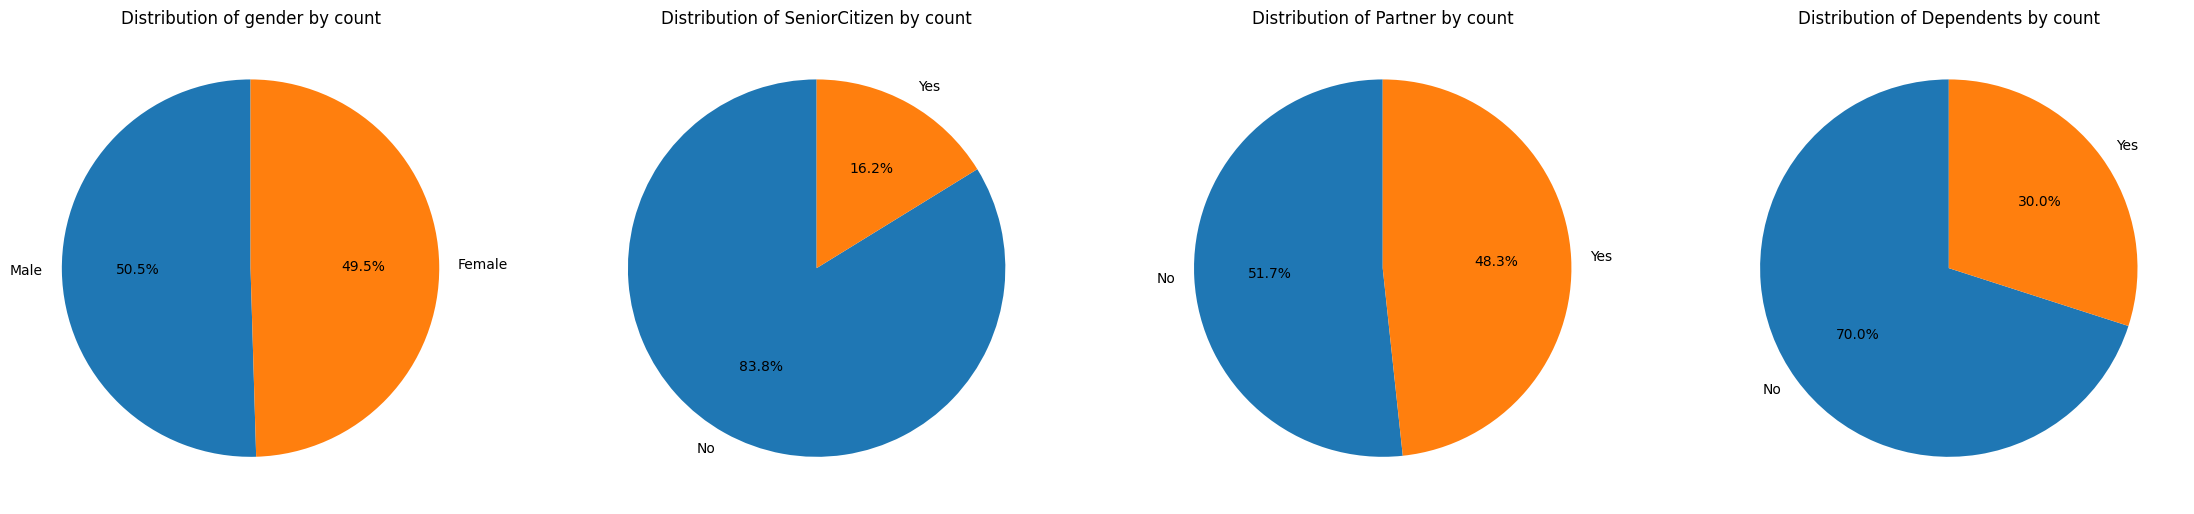

In [42]:
# plot pie chart for alll the categorical features (seperate into two different plots)
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)
fig, ax = plt.subplots(1, 4, figsize=(28, 16))
for i, ax in enumerate(ax.flatten()):
    if i < len(categorical_features):
        df[categorical_features[i]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
        ax.set_title(f'Distribution of {categorical_features[i]} by count')
        # remove y-axis label
        ax.set_ylabel('')
        
    else:
        ax.set_visible(False)
        

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


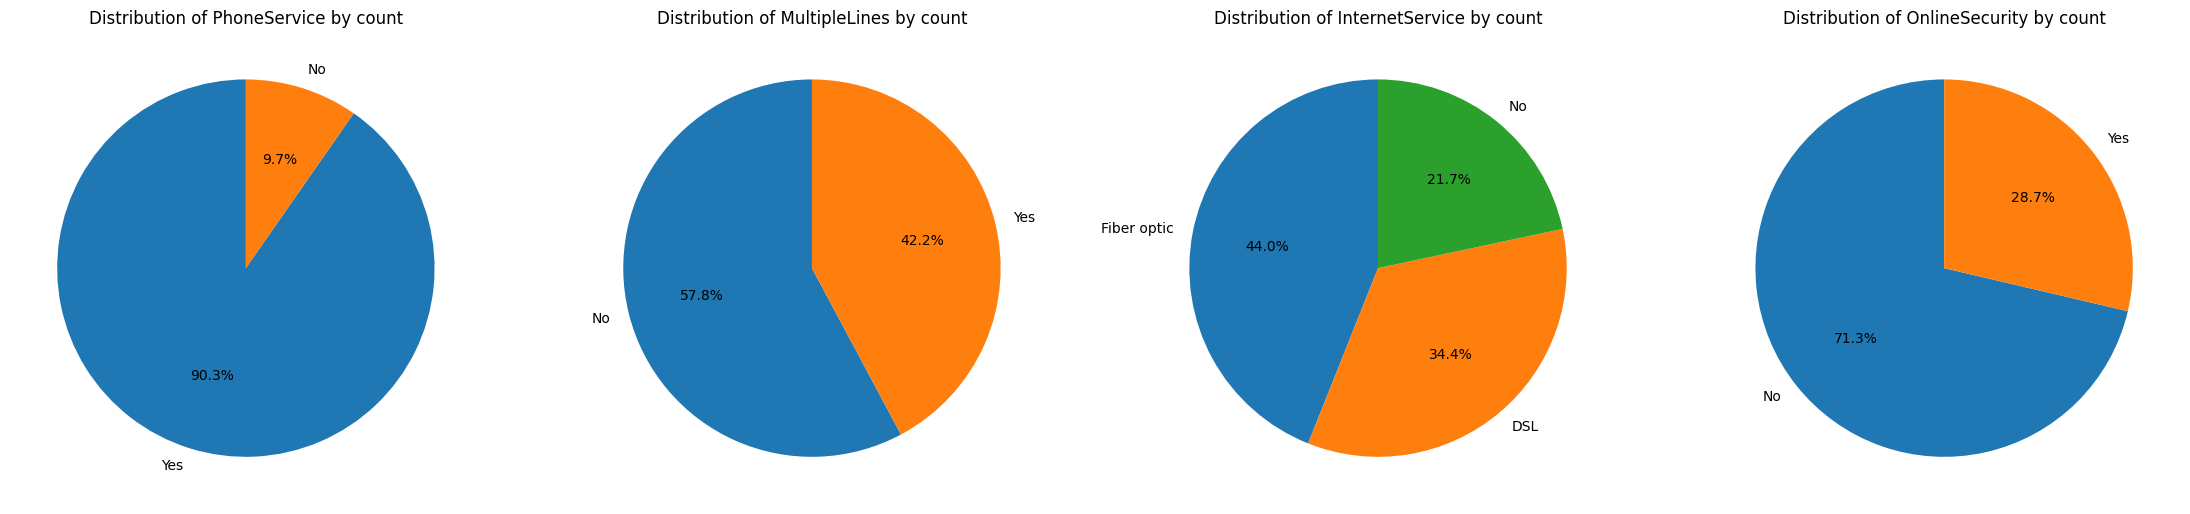

In [43]:
# plot pie chart for alll the categorical features (seperate into two different plots)
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)
fig, ax = plt.subplots(1, 4, figsize=(28, 16))
for i, ax in enumerate(ax.flatten()):
    if i < len(categorical_features):
        df[categorical_features[i+4]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
        ax.set_title(f'Distribution of {categorical_features[i+4]} by count')
        # remove y-axis label
        ax.set_ylabel('')
        
    else:
        ax.set_visible(False)
        

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


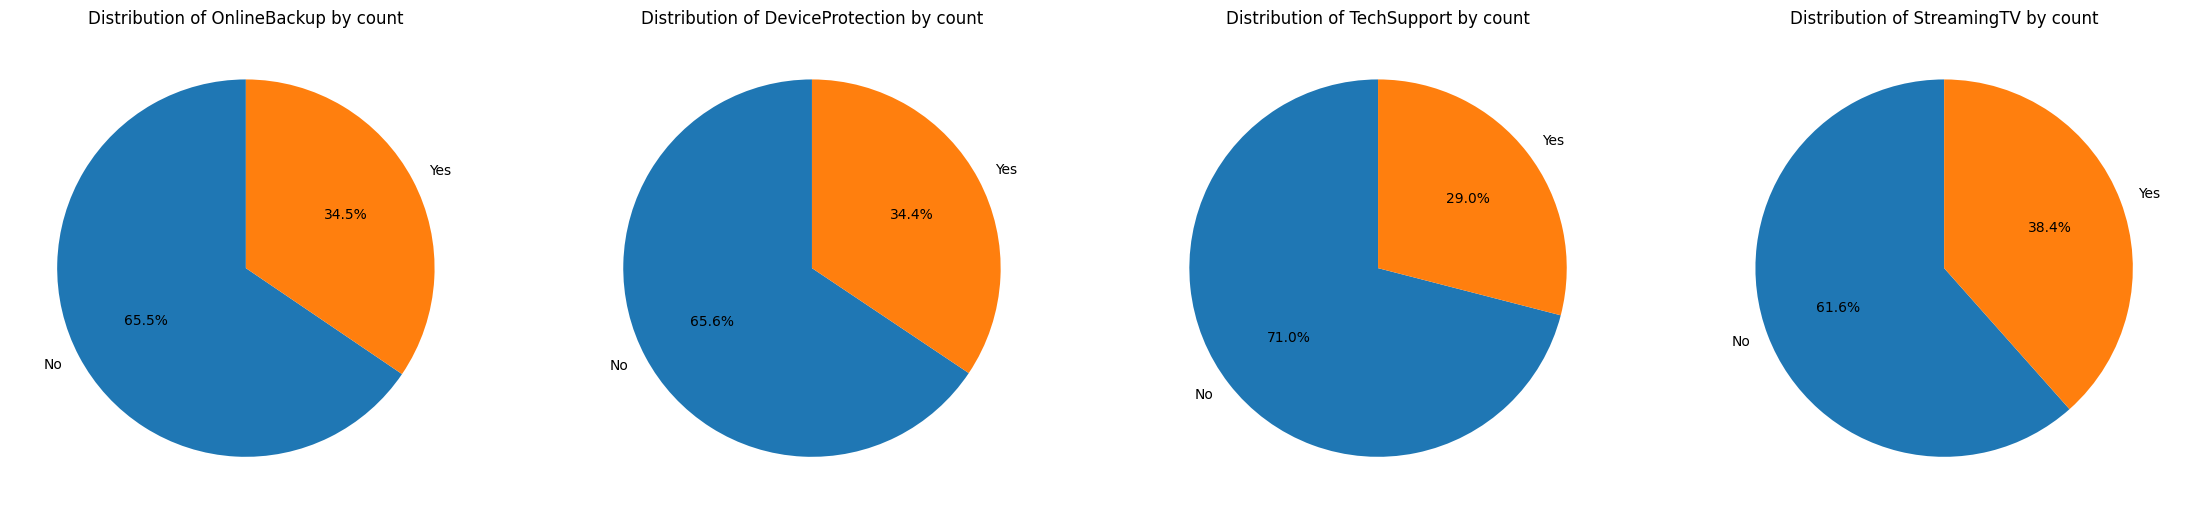

In [44]:
# plot pie chart for alll the categorical features (seperate into two different plots)
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)
fig, ax = plt.subplots(1, 4, figsize=(28, 16))
for i, ax in enumerate(ax.flatten()):
    if i < len(categorical_features):
        df[categorical_features[i+8]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
        ax.set_title(f'Distribution of {categorical_features[i+8]} by count')
        # remove y-axis label
        ax.set_ylabel('')
        
    else:
        ax.set_visible(False)
        

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


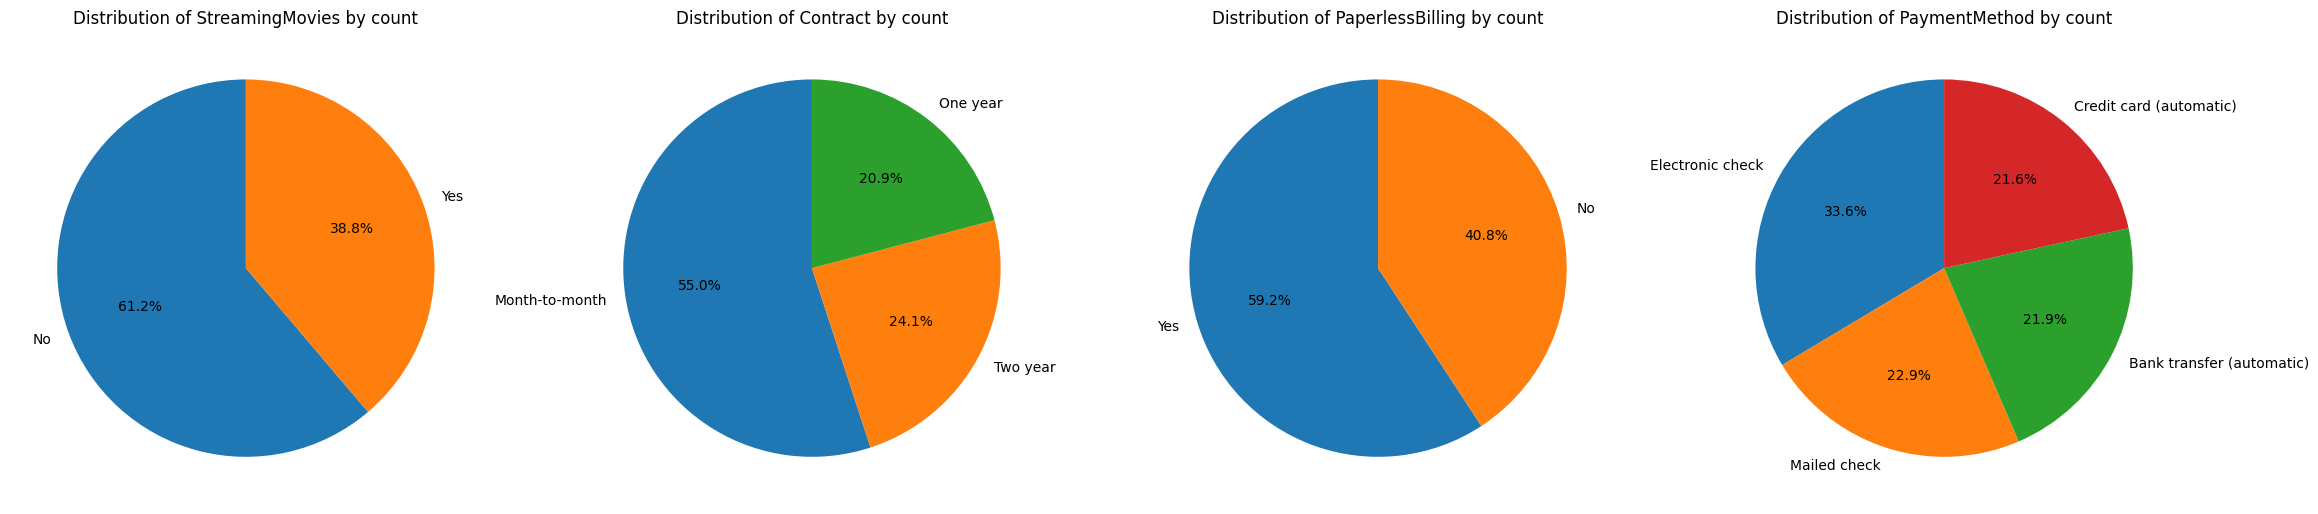

In [45]:
# plot pie chart for alll the categorical features (seperate into two different plots)
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)
fig, ax = plt.subplots(1, 4, figsize=(28, 16))
for i, ax in enumerate(ax.flatten()):
    if i < len(categorical_features):
        df[categorical_features[i+12]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
        ax.set_title(f'Distribution of {categorical_features[i+12]} by count')
        # remove y-axis label
        ax.set_ylabel('')
        
    else:
        ax.set_visible(False)
        

Next, we plot a barplot for `Churn`:

C:\Users\User\AppData\Local\Temp\ipykernel_22948\659198953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


Text(0.5, 0, 'Churn')

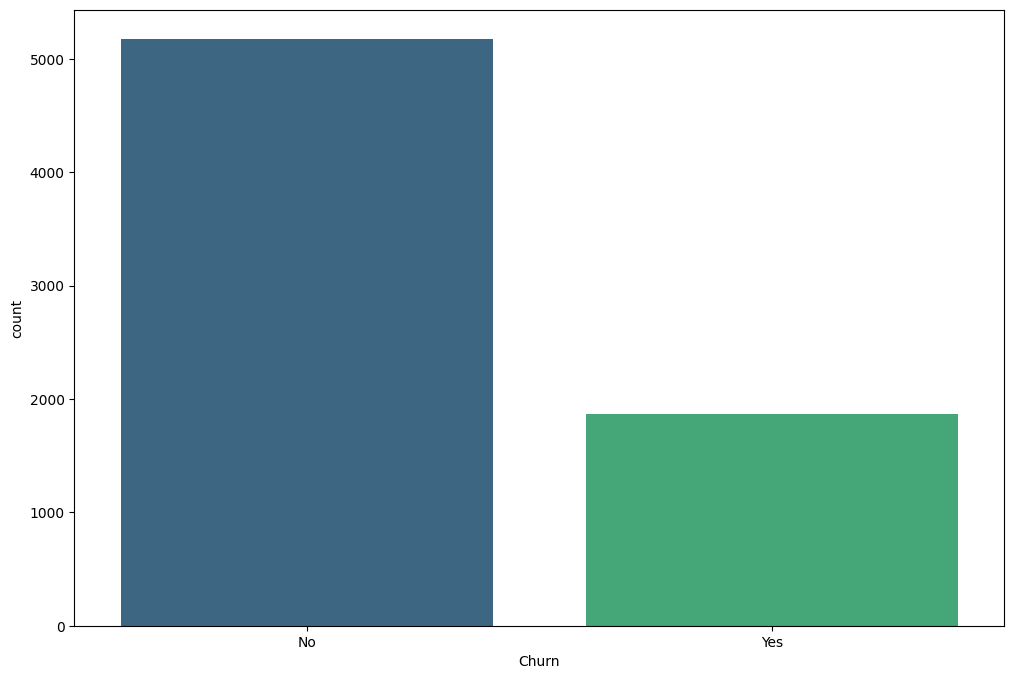

In [11]:
#Barplot for churn
plt.figure(figsize=(12, 8))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.xlabel('Churn')

There is more customer churn than, without churn, which would be normal in a business (if you have more customer churn in your business than those that are non something is definately wrong!).

### 4.3 More on `Churn`

In this subsection, we focus more on `Churn` as it is our target value. We can start by looking into its relationship with numerical features of `tenure` and `MonthlyCharges`:

Text(0.5, 1.0, 'Scatterplot of tenure and monthly charges')

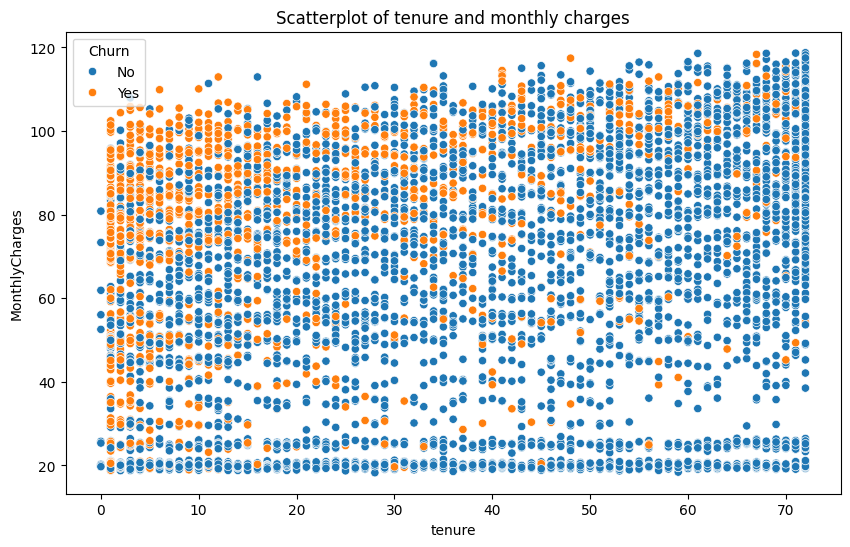

In [12]:
# scatterplot of tenure and monthly charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn')
plt.title('Scatterplot of tenure and monthly charges')



From the scatterplot, we can see that most customer who churned are those who have low `tenure` and high `MonthlyCharges`, which is the cluster at the upper right part of the scatter plot. The distribution between `tenure` and `MonthlyCharges` is quite even, meaning that there exist customers in any range of montly charges in any month of tenure. To gain further insight, we create a new column called `churn_rate_by_tenure`, which is derived from the percentage of customer churn based on each tenure month:

In [13]:
df_temp = df.copy()

# adopted from https://www.kaggle.com/code/khangluu4903/telco-customer-churn
df_temp["churn_rate_by_tenure"] = df_temp.groupby("tenure")["Churn"].transform(lambda x: (x == "Yes").mean() * 100)
df = df_temp.copy()

Text(0.5, 1.0, 'Scatter plot of tenure and churn rate')

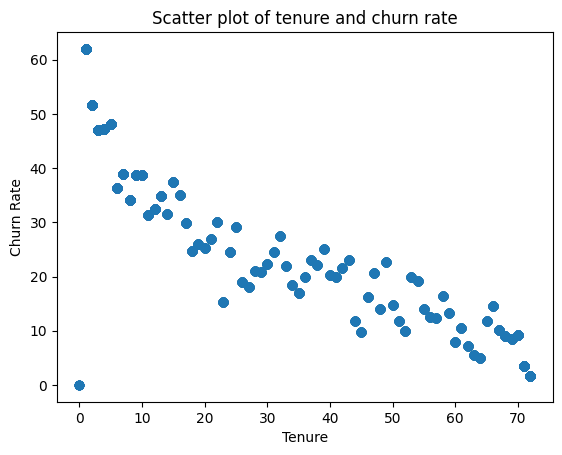

In [14]:
# scatter plot of tenure and churn rate
plt.scatter(df["tenure"], df["churn_rate_by_tenure"])
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.title("Scatter plot of tenure and churn rate")



From the scatter plot, we can clearly see that tenure and churn rate have a negative correlation, as tenure increases, the rate of customer churning will decreases.

Next, we can check the relationship between categoricals value agaisnt `Churn`. We can use compartive bar plot for this task:

In [75]:
# reference to https://stackoverflow.com/questions/64754905/create-100-stacked-bar-chart
def plt_percentage_bar(ax, x_var, y_var, df):
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
    df_grouped.plot.bar(stacked=True, ax=ax)
    # pd.crosstab(df[x_var], df[y_var], normalize="index").plot(kind="bar", stacked=True, ax=ax)
    # ax.legend(
    #     bbox_to_anchor=(0.5, 1.02),
    #     loc="lower center",
    #     borderaxespad=0,
    #     frameon=False,
    #     ncol=3,
    # )
    
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                ax.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    # plt.tight_layout()

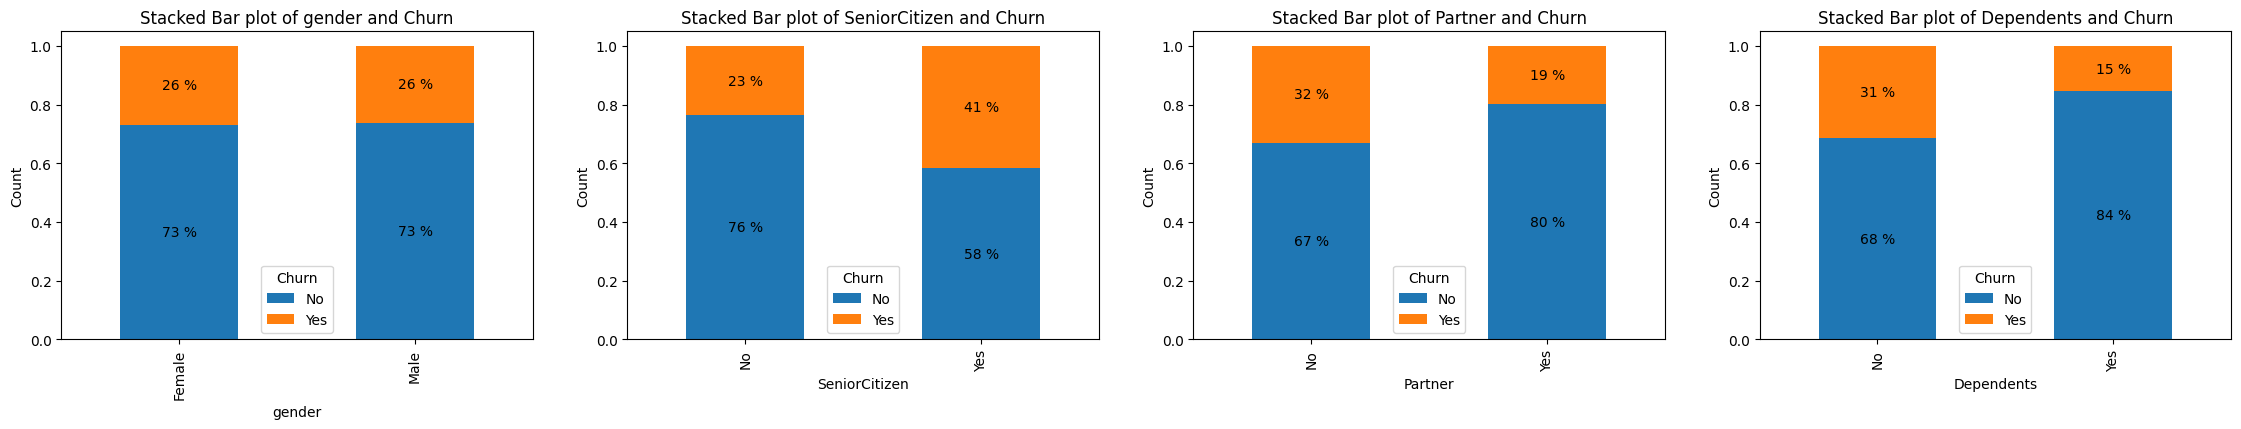

In [66]:
# get stacked bar plot for the categorical features
fig, ax = plt.subplots(1, 4, figsize=(28, 4))

# enumerate first 4 categorical features
for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        # pd.crosstab(df[categorical_features[i]], df['Churn']).plot(kind='bar', stacked=True, ax=_ax)
        plt_percentage_bar(_ax, categorical_features[i], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i]} and Churn')
        _ax.set_ylabel('Count')
    else:
        _ax.set_visible(False)


The ratio of customer churn for `gender` is the same for male and female, indicating that gender have no affects on customer`s churn rate. The churn rate is higher for those who are senior citizen, same with those who do not have a partner or dependents.

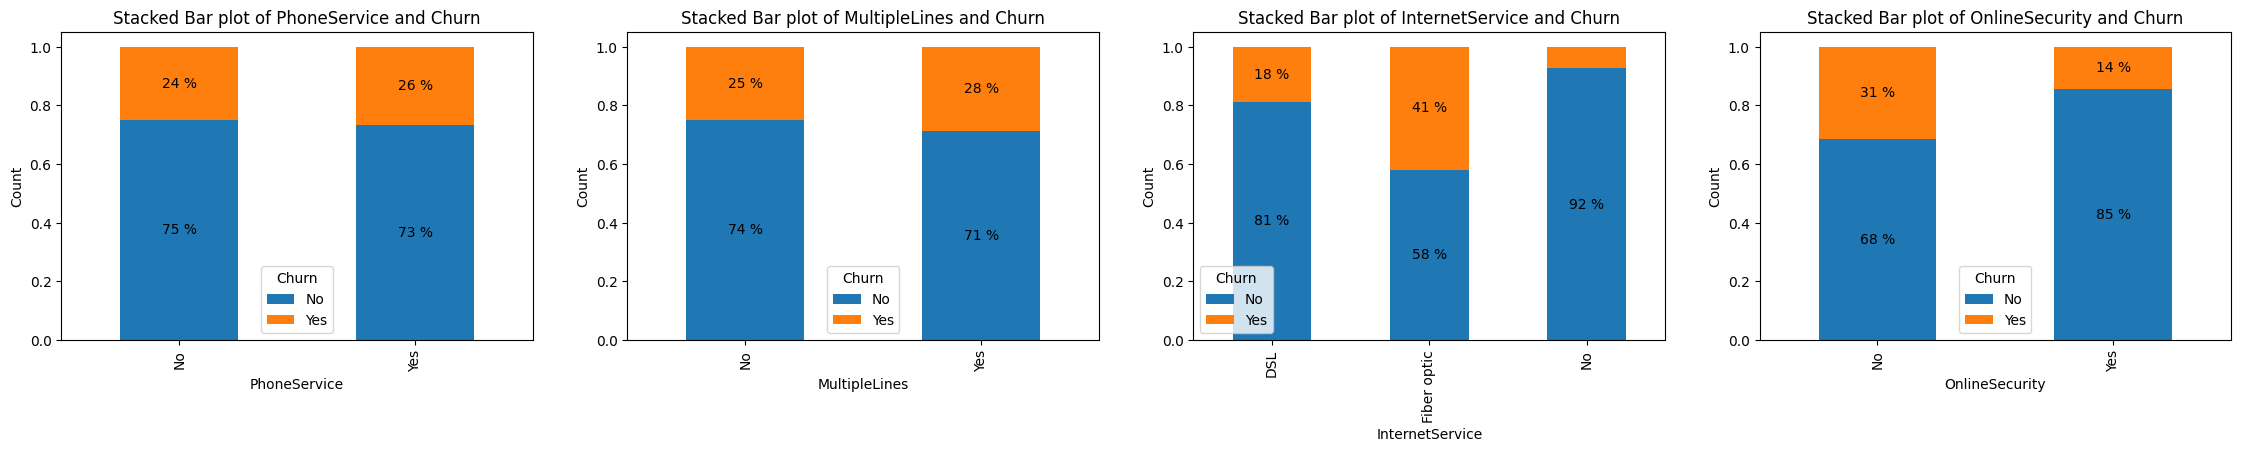

In [76]:
# get stacked bar plot for the categorical features
fig, ax = plt.subplots(1, 4, figsize=(28, 4))

# enumerate first 4 categorical features
for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        # pd.crosstab(df[categorical_features[i+4]], df['Churn']).plot(kind='bar', stacked=True, ax=_ax)
        plt_percentage_bar(_ax, categorical_features[i+4], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i+4]} and Churn')
        _ax.set_ylabel('Count')
    else:
        _ax.set_visible(False)

Whether customers have `PhoneService` and `MultipleLines` does not really seems to have affect on their churn, while customer with `Fiber optic` as `InternetService` have more percentage of Churn, similar to customer without `OnlineSecurity`

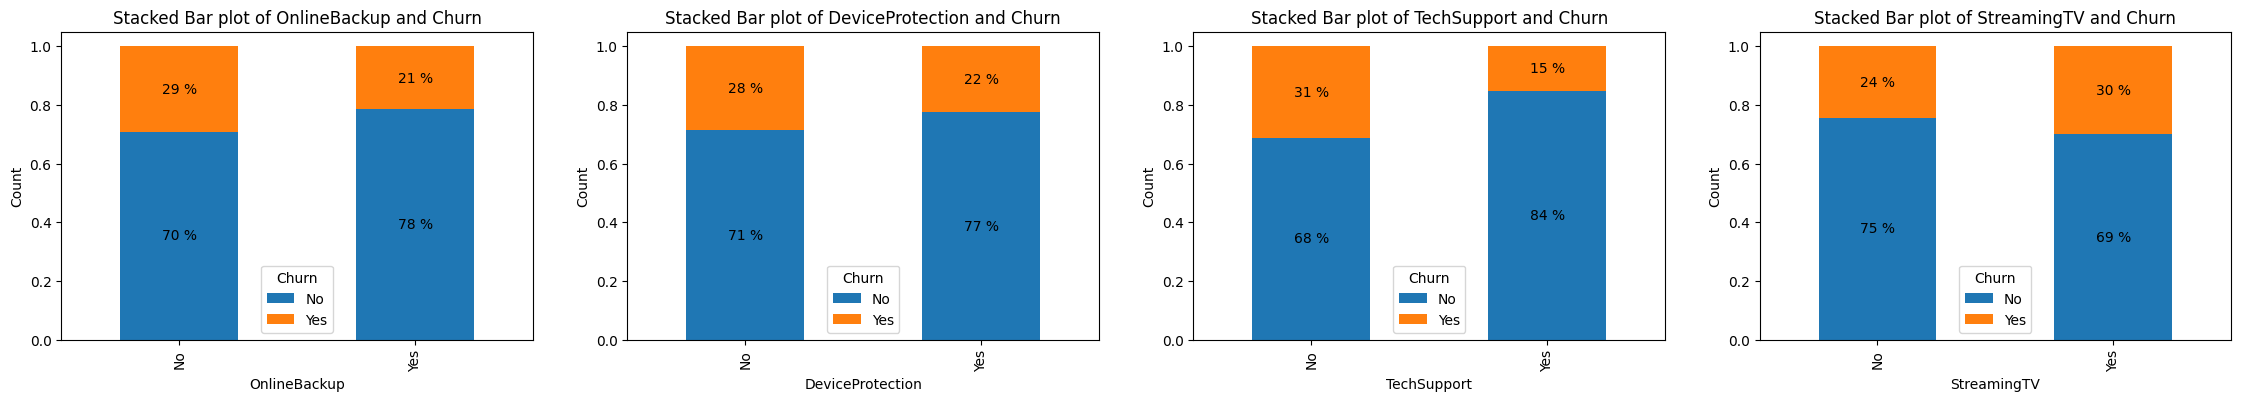

In [77]:
fig, ax = plt.subplots(1, 4, figsize=(28, 4))

for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        # pd.crosstab(df[categorical_features[i+8]], df['Churn']).plot(kind='bar', stacked=True, ax=_ax)
        
        plt_percentage_bar(_ax, categorical_features[i+8], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i+8]} and Churn')
        _ax.set_ylabel('Count')
    else:
        _ax.set_visible(False)

There is not much different in the ratio of churn rate for `OnlineBackup`, `DeviceProtection`, and `StreamingTV`. Customers seems to be less likely to churn after they received `TechSupport`, perhaps the customer service of their tech supports conviced the customer to stay.

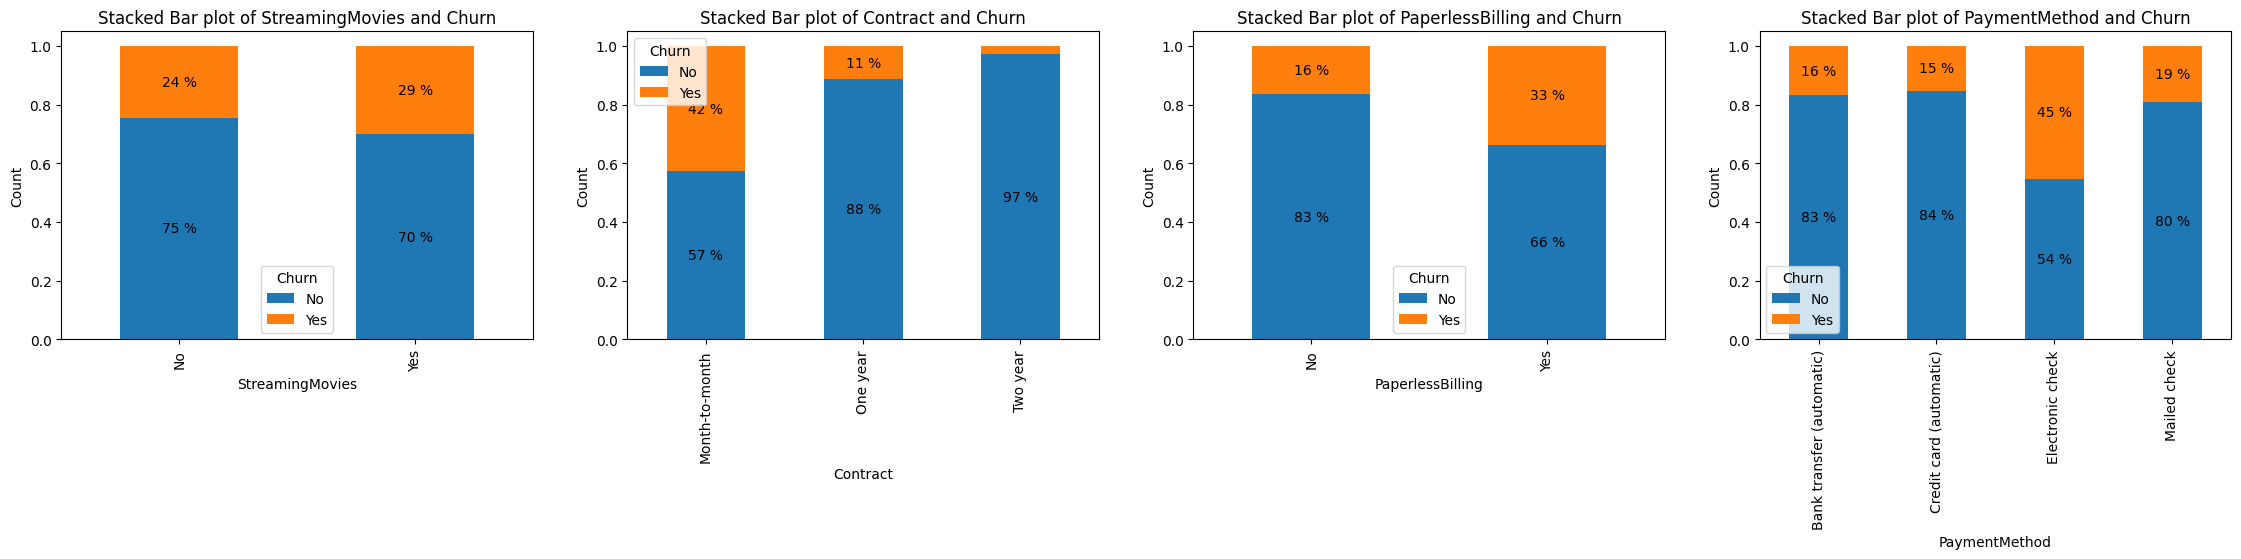

In [78]:
fig, ax = plt.subplots(1, 4, figsize=(28, 4))

for i, _ax in enumerate(ax.flatten()):
    if i < 4:
        # pd.crosstab(df[categorical_features[i+12]], df['Churn']).plot(kind='bar', stacked=True, ax=_ax)
        
        plt_percentage_bar(_ax, categorical_features[i+12], 'Churn', df)
        _ax.set_title(f'Stacked Bar plot of {categorical_features[i+12]} and Churn')
        _ax.set_ylabel('Count')
    else:
        _ax.set_visible(False)

There is not much different in churn rate for customers who were streaming movies or not. Customers with `Month-to-month` `Contract` have a whopping 42% of churn rate, similar to customer with `Electronice check` as their `PaymentMethod`, with churn rate of 45%. Customer with `PaperlessBilling` also have slightly higher churn rate compared to those that uses paper billing. 